# Ames Housing
## Linear Model

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import RFE

In [2]:
pd.set_option('display.max_columns', 500) # This will allow me to view 500 rows in the notebook
pd.set_option('display.max_rows', 500) # This will allow me to view 500 rows in the notebook

In [3]:
df_train = pd.read_csv('./datasets/train_clean.csv') # This is what we'll need to work with!
df_test = pd.read_csv('./datasets/test_clean.csv') # We won't touch this until after we've created model

In [4]:
# Setting the index for our data frame according to one of the columns (Id)
df_train = df_train.set_index('Id')
df_test = df_test.set_index('Id')

In [5]:
# Convert the street categories into processable numbers (i.e. turn categories into dummy variables)
nominal_data = [
    'MS SubClass', 
    'MS Zoning', 
    'Lot Shape', 
    'Land Contour', 
    'Utilities', 
    'Lot Config', 
    'Land Slope', 
    'Neighborhood', 
    'Condition 1', 
    'Condition 2', 
    'Bldg Type', 
    'House Style', 
    'Roof Style', 
    'Roof Matl', 
    'Exterior 1st', 
    'Exterior 2nd', 
    'Mas Vnr Type', 
    'Foundation', 
    'BsmtFin Type 1', 
    'BsmtFin Type 2', 
    'Heating', 
    'Central Air', 
    'Electrical', 
    'Functional', 
    'Garage Type', 
    'Garage Finish', 
    'Paved Drive', 
    'Sale Type'
]

In [6]:
ordinal_data = [
    'Overall Cond',
    'Exter Qual',
    'Exter Cond',
    'Bsmt Qual',
    'Bsmt Cond',
    'Bsmt Exposure',
    'Heating QC',
    'Kitchen Qual',
    'Garage Qual',
    'Garage Cond'
]

In [7]:
for col in nominal_data:
    df_train = pd.get_dummies(df_train, columns=[col], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=[col], drop_first=True)

In [8]:
for col in ordinal_data:
    df_train = pd.get_dummies(df_train, columns=[col], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=[col], drop_first=True)

In [9]:
neighborhood_features = [col for col in df_test.columns if col[0] == 'N']

In [10]:
# Making a list of our potential features
potential_features = [
'Overall Qual', 
'Year Built',
'Year Remod/Add',
'Total Bsmt SF',
'1st Flr SF',
'Gr Liv Area',
'Full Bath',
'Garage Area'
]

'Garage Cars' was dropped because correlated with 'Garage Area'

'1st Flr SF' was dropped because correlated with basement SF

In [11]:
corr_features = [
    'Lot Area', 
    'Overall Qual', 
    'Year Built', 
    'Year Remod/Add', 
    'Mas Vnr Area', 
    'Total Bsmt SF',
    'BsmtFin SF 1',
    'TotRms AbvGrd',
    '1st Flr SF', 
    'Gr Liv Area', 
    'Full Bath', 
    'Half Bath',
    'Fireplaces', 
    'Garage Area',  
    'Wood Deck SF', 
    'Open Porch SF', 
    'Enclosed Porch'
]

In [12]:
n_corr_features = [
    'Neighborhood_BrDale',
    'Neighborhood_Crawfor',
    'Neighborhood_NoRidge', 
    'Neighborhood_NridgHt',
    'Neighborhood_OldTown',
    'Neighborhood_StoneBr',
    'Neighborhood_Edwards',
    'Neighborhood_Timber',
    'Neighborhood_Veenker'
]

In [13]:
d_corr_features = [
    'MS SubClass_60',
    'Lot Shape_Reg',
    'House Style_2Story',
    'Roof Style_Hip',
    'Sale Type_New', 
    'Paved Drive_Y', 
    'Garage Finish_Unf', 
    'Garage Type_Detchd', 
    'Foundation_PConc', 
    'Foundation_Stone',
    'Mas Vnr Type_None',
    'Mas Vnr Type_Stone',
    'BsmtFin Type 1_GLQ',
    'Exterior 1st_VinylSd',
    'Central Air_Y',
    'Electrical_SBrkr',
]

In [34]:
ordinal_features_temp = list(df_train.columns[-47:])

In [35]:
ordinal_features_remove = ['Bsmt Exposure_Missing', 'Heating QC_Po', 'Garage Qual_Fa', 'Bsmt Cond_Po', 'Bsmt Cond_Fa']

In [36]:
ordinal_features = [item for item in ordinal_features_temp if item not in ordinal_features_remove]

'Exterior 2nd_VinylSd' was dropped because correlated with 1st

In [14]:
df_train['after_2000'] = df_train['Year Built'].map(lambda x: 2 if x>=2000 else 0)
df_test['after_2000'] = df_test['Year Built'].map(lambda x: 2 if x>=2000 else 0)

In [15]:
df_train['year_2'] = df_train['Year Built']**2
df_test['year_2'] = df_test['Year Built']**2

In [37]:
candidate_features = corr_features + neighborhood_features + d_corr_features + ordinal_features

In [89]:
# Selecting our features to use in our model
features = selected_features_R
X_train = df_train[features]
y_train = df_train['SalePrice']
X_test = df_test[features]

In [90]:
# Scaling our features
ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [91]:
# Instantiate our linear regression object: 
lr = LinearRegression()

In [92]:
# Cross validation to check for high variance and overfitting
cross_val_score(lr, X_train, y_train, cv=3)

array([0.89657135, 0.91047254, 0.90498466])

In [93]:
# Fit our model:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
# Checking the r-squared value for our training set
lr.score(X_train, y_train)

0.9127673421593792

In [95]:
# What are columns that are fed as input?

In [96]:
# What is beta_0?
lr.intercept_

181479.01805758907

In [97]:
# What are the rest of our betas?
lr.coef_

array([  5597.2561817 ,  12105.44897449,   9534.65030757,   1615.1734629 ,
         3118.20758292,   9691.81345996,   8115.69997455,  23188.75075701,
         3875.57468726,   6142.67171746,   -192.90819115,   -393.72397828,
        -2588.57675233,   -333.17391223,  -1572.47717378,  -1688.54871604,
        -1702.24883133,  -2947.64303092,  -2432.36150949,   4124.20884881,
         3787.24042724,  -3100.28528222,  -1490.26928694,  -1524.95498445,
         4571.19295484,   -286.22963639,   4904.76593748,   3094.18790837,
        10217.11004179,  10220.46036362,  11741.29171985,   8235.49539548,
         5680.6197501 ,   -982.43556704,  -2431.89809084,  -3401.62361943,
       -12068.87166487, -11308.64858786,  -1541.6585201 ,   4910.80560875,
        -2732.40367204,  -5326.89306094, -16081.48516223, -17697.26238488,
         2136.22916676,   1133.68348176])

In [98]:
import statsmodels.api as sm
X_train_with_c = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_c).fit()

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     455.4
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:26:31   Log-Likelihood:                -23523.
No. Observations:                2049   AIC:                         4.714e+04
Df Residuals:                    2002   BIC:                         4.740e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.815e+05    523.302    346.796      0.000     1.8e+05    1.83e+05
x1          5597.2562    605.142      9.249      0.000    4410.482    6784.030
x2          1.211e+04   1070.017     11.313      0.000       1e+04    1.42e+04
x3          9534.6503   1341.654      7.107      0.000    6903.467    1.22e+04
x4          1615.1735    902.298      1.790      0.074    -154.368    3384.715
x5          3118.2076    650.506      4.794      0.000    1842.469    4393.946
x6          9691.8135   1007.692      9.618      0.000    7715.579    1.17e+04
x7          8115.7000    667.863     12.152      0.000    6805.920    9425.480
x8          2.319e+04    934.612     24.811      0.000    2.14e+04     2.5e+04
x9          3875.5747    652.837      5.937      0.000    2595.263    5155.886
x10         6142.6717    857.826      7.161      0.000    4460.347    7824.996
x11         -192.9082    640.098     -0.301      0.763   -1448.236    1062.419
x12         -393.7240    639.181     -0.616      0.538   -1647.254     859.806
x13        -2588.5768    668.108     -3.874      0.000   -3898.837   -1278.317
x14         -333.1739    631.734     -0.527      0.598   -1572.098     905.750
x15        -1572.4772    663.135     -2.371      0.018   -2872.985    -271.970
x16        -1688.5487    573.869     -2.942      0.003   -2813.992    -563.106
x17        -1702.2488    606.888     -2.805      0.005   -2892.447    -512.051
x18        -2947.6430    785.845     -3.751      0.000   -4488.803   -1406.483
x19        -2432.3615    605.580     -4.017      0.000   -3619.995   -1244.728
x20         4124.2088    598.967      6.886      0.000    2949.545    5298.873
x21         3787.2404    685.267      5.527      0.000    2443.328    5131.152
x22        -3100.2853    781.697     -3.966      0.000   -4633.311   -1567.260
x23        -1490.2693    642.985     -2.318      0.021   -2751.259    -229.279
x24        -1524.9550    585.736     -2.603      0.009   -2673.671    -376.239
x25         4571.1930    570.280      8.016      0.000    3452.789    5689.597
x26         -286.2296    802.884     -0.357      0.722   -1860.806    1288.347
x27         4904.7659    605.850      8.096      0.000    3716.603    6092.928
x28         3094.1879    838.416      3.691      0.000    1449.928    4738.448
x29         1.022e+04   1938.903      5.270      0.000    6414.631     1.4e+04
x30         1.022e+04   1520.062      6.724      0.000    7239.392    1.32e+04
x31         1.174e+04   1377.616      8.523      0.000    9039.581    1.44e+04
x32         8235.4954   1005.566      8.190      0.000    6263.430    1.02e+04
x33         5680.6198    723.766      7.849      0.000    4261.207    7100.032
x34         -982.4356    616.525     -1.594      0.111   -2191.534     226.663
x35        -2431.8981    977.207     -2.489      0.013   -4348.348    -515.449
x3

In [101]:
# Make Predictions
y_hat_lr_train = lr.predict(X_train)  # familiar data
y_hat_lr_test = lr.predict(X_test) # unseen/unfamiliar data

# Get RMSE
np.sqrt(metrics.mean_squared_error(y_train, y_hat_lr_train))

23414.471238096958

In [102]:
r_alphas = np.logspace(0,5,100)
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_model=ridge_model.fit(X_train, y_train)

In [103]:
r_predictions = ridge_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, r_predictions))

23432.18618430156

In [104]:
l_alphas = np.logspace(-3, 0, 100)
lasso_model = LassoCV(alphas=l_alphas, cv=5)
lasso_model = lasso_model.fit(X_train, y_train)

In [105]:
l_predictions = lasso_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, l_predictions))

23414.477168668316

In [106]:
l_predictions

array([188133.82302844, 223179.27928399, 131652.87609114, ...,
       163789.04042845, 118704.30678469, 192804.33180294])

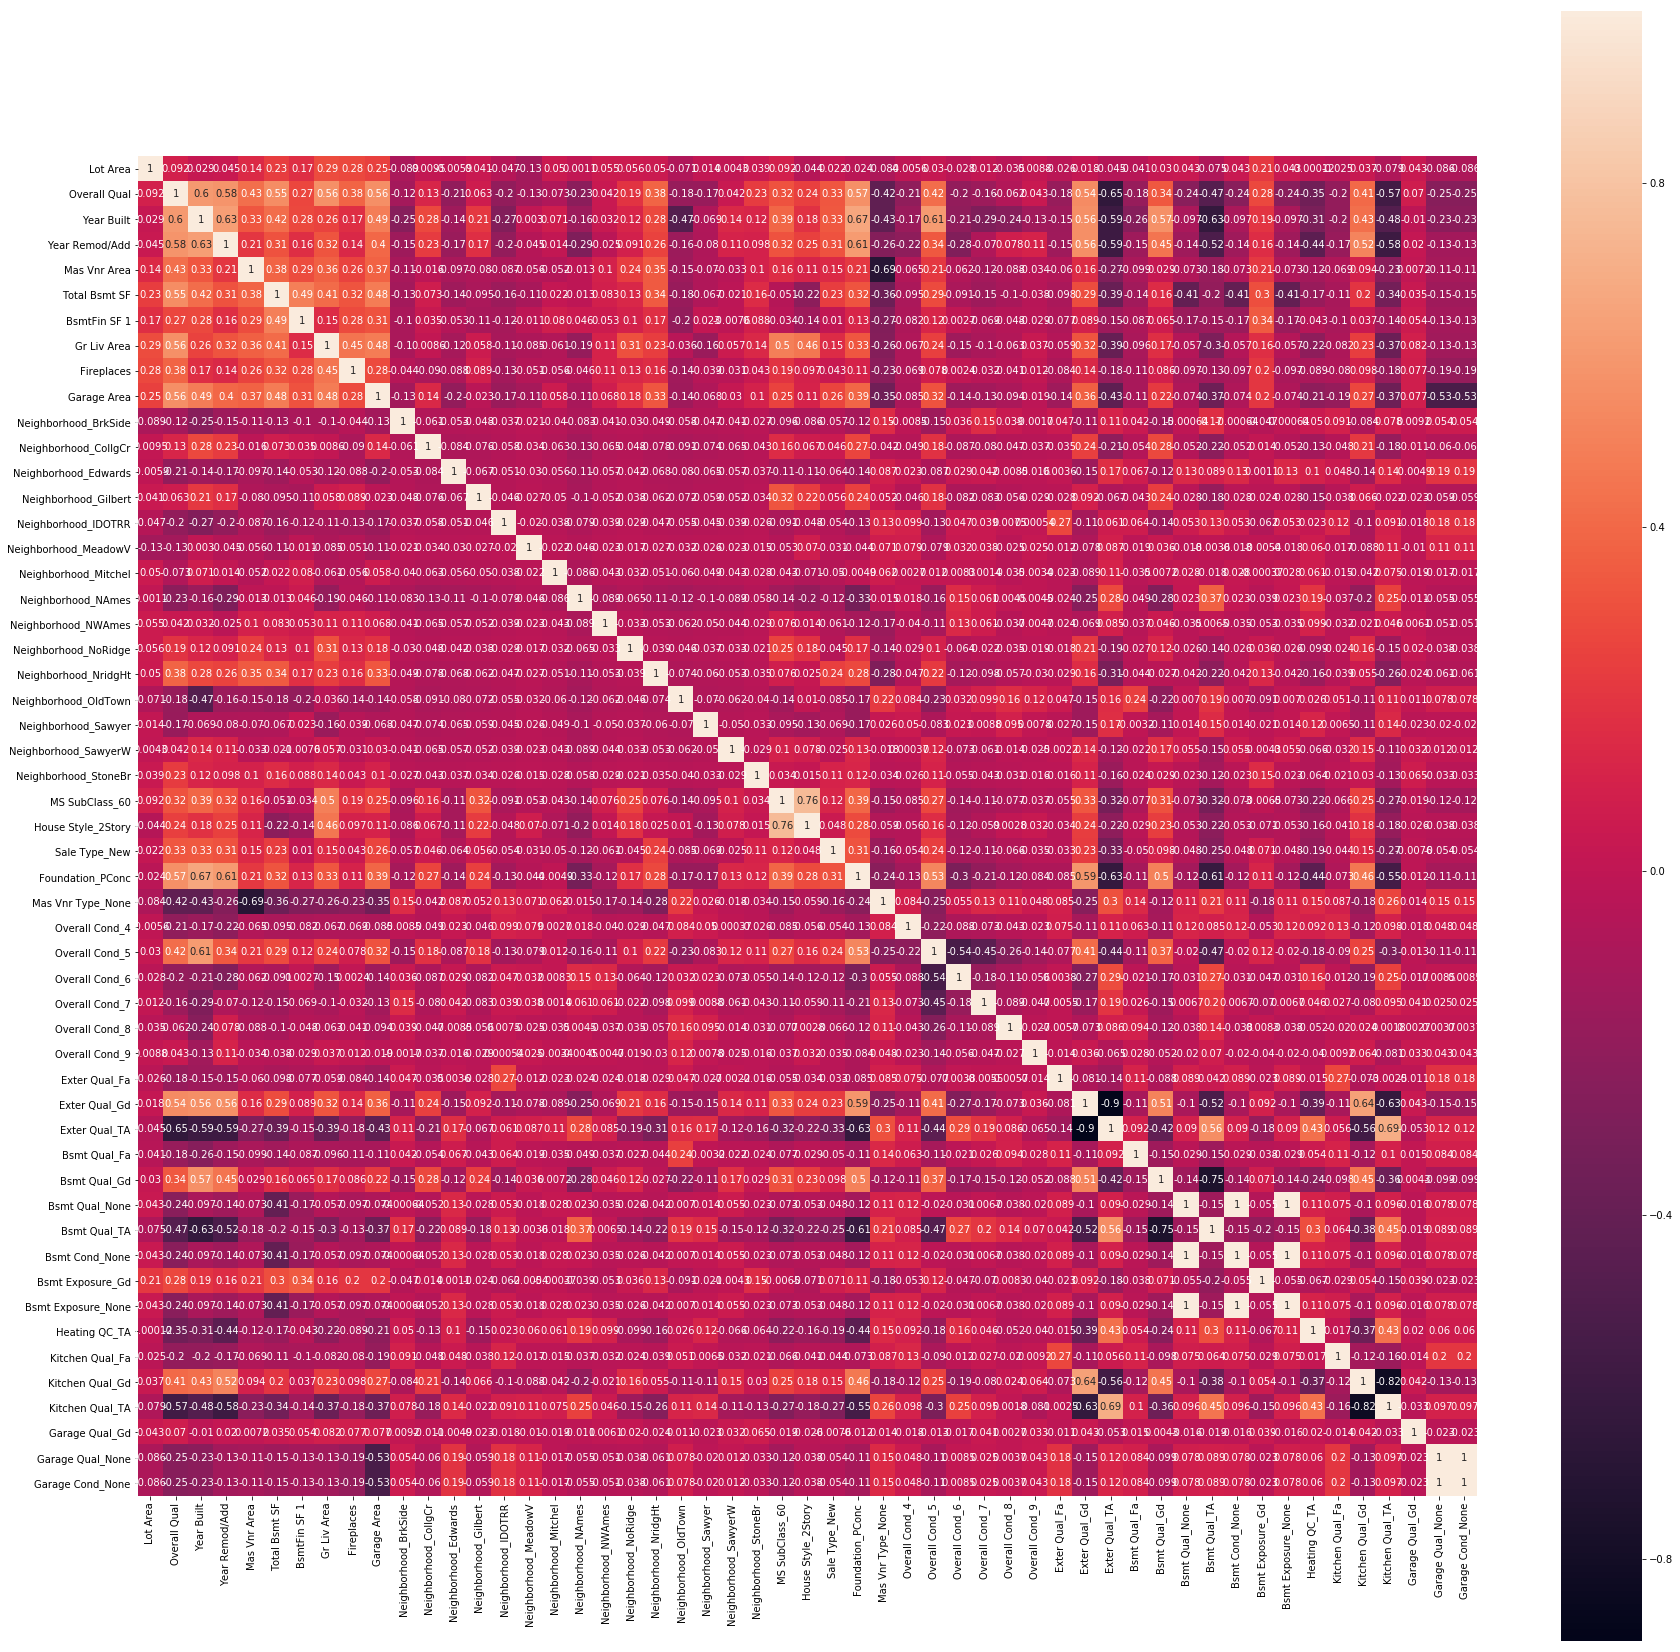

In [86]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train[selected_features_RFE].corr(), square=True, annot=True);

In [87]:
features_to_remove = ['Mas Vnr Type_None', 'MS SubClass_60', 'Foundation_PConc', 'Bsmt Qual_None', 'Bsmt Exposure_None', 'Garage Qual_None', 'Exter Qual_Gd']

In [88]:
selected_features_R = [item for item in selected_features_RFE if item not in features_to_remove]

In [61]:
#no of features
nof_list=np.arange(1,100)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_1,y_train_1)
    X_test_rfe = rfe.transform(X_test_1)
    model.fit(X_train_rfe,y_train_1)
    score = model.score(X_test_rfe,y_test_1)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 32
Score with 32 features: 0.914170


In [62]:
cols = list(df_train[features])

rfe = RFE(lr, 53)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
lr.fit(X_rfe,y_train)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'Total Bsmt SF', 'BsmtFin SF 1', 'Gr Liv Area',
       'Fireplaces', 'Garage Area', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'MS SubClass_60',
       'House Style_2Story', 'Sale Type_New', 'Foundation_PConc',
       'Mas Vnr Type_None', 'Overall Cond_4', 'Overall Cond_5',
       'Overall Cond_6', 'Overall Cond_7', 'Overall Cond_8', 'Overall Cond_9',
       'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA', 'Bsmt Qual_Fa',
       'Bsmt Qual_Gd', 'Bsmt Qual_None', 'Bsmt Qual_TA', 'Bsmt Cond_None',
       'Bsmt Exposure_Gd', 'Bsmt Exposure_None', 'Heating QC

In [63]:
selected_features_RFE = list(selected_features_rfe)

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

Text(0.5, 1.0, 'Feature importance using Lasso Model')

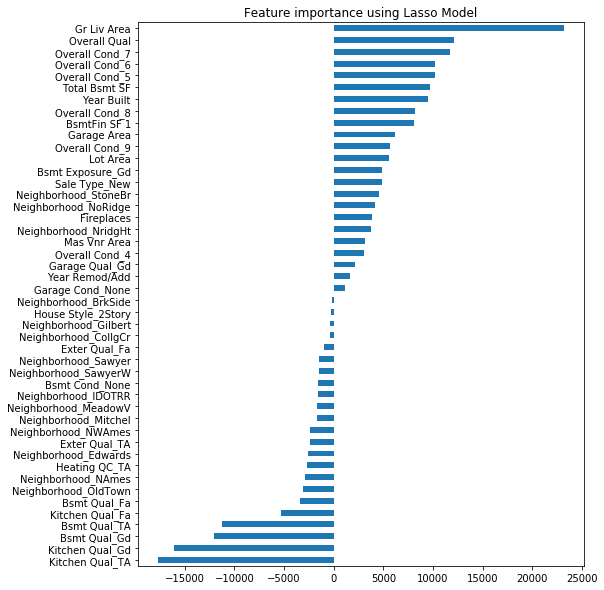

In [107]:
coef = pd.Series(lasso_model.coef_, index = df_train[features].columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [43]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 59 variables and eliminated the other 0 variables


# Preparing .csv to submit to Kaggle

In [81]:
# Create a dataframe of our features from our testing data
X_kaggle = df_test[features]

### WARNING ###
# NEED to apply the feature engineering methods you did above to this X_kaggle dataset too!
# Otherwise, your model won't have the inputs it expects!
#X_kaggle = pd.get_dummies(X_kaggle, columns = ["Street"])

In [82]:
# Make predictions and save those predictions to a new column
X_kaggle['SalePrice'] = lasso_model.predict(X_test)
X_kaggle.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,BsmtFin SF 1,Gr Liv Area,Fireplaces,Garage Area,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,MS SubClass_60,House Style_2Story,Sale Type_New,Foundation_PConc,Mas Vnr Type_None,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_TA,Bsmt Cond_None,Bsmt Exposure_Gd,Bsmt Exposure_None,Heating QC_TA,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Garage Qual_Gd,Garage Qual_None,Garage Cond_None,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,9142,6,1910,1950,0.0,1020,0,1928,0,440.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,151811.650141
2718,9662,5,1977,1977,0.0,1967,0,1967,0,580.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,177767.878123
2414,17104,7,2006,2006,0.0,654,554,1496,1,426.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,213327.384024
1989,8520,5,1923,2006,0.0,968,0,968,0,480.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,103648.306412
625,9500,6,1963,1963,247.0,1394,609,1394,2,514.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,170146.942965


In [83]:
X_kaggle.head()

,Lot Area,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,BsmtFin SF 1,Gr Liv Area,Fireplaces,Garage Area,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,MS SubClass_60,House Style_2Story,Sale Type_New,Foundation_PConc,Mas Vnr Type_None,Overall Cond_4,Overall Cond_5,Overall Cond_6,Overall Cond_7,Overall Cond_8,Overall Cond_9,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_None,Bsmt Qual_TA,Bsmt Cond_None,Bsmt Exposure_Gd,Bsmt Exposure_None,Heating QC_TA,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Garage Qual_Gd,Garage Qual_None,Garage Cond_None,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,9142,6,1910,1950,0.0,1020,0,1928,0,440.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,151811.650141
2718,9662,5,1977,1977,0.0,1967,0,1967,0,580.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,177767.878123
2414,17104,7,2006,2006,0.0,654,554,1496,1,426.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,213327.384024
1989,8520,5,1923,2006,0.0,968,0,968,0,480.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,103648.306412
625,9500,6,1963,1963,247.0,1394,609,1394,2,514.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,170146.942965


In [84]:
# Create a new dataframe of JUST our predictions
output = X_kaggle[['SalePrice']]
output.head()

,SalePrice
Id,
2658,151811.650141
2718,177767.878123
2414,213327.384024
1989,103648.306412
625,170146.942965


In [85]:
# Saving our predictions to our datasets folder
output.to_csv("./datasets/submission_lasso_final.csv")